# Project: Wrangling and Analyze Data

In [2]:
# import necessary libraries 
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import datetime

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
archived_tweets = pd.read_csv('twitter-archive-enhanced.csv')
archived_tweets.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jackson. There's nothing abnormal abou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558...,10,10,Jackson,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
# access the tsv file
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv', 'wb') as image_prediction_file:
    image_predictions_gathered = requests.get(image_predictions_url)
    image_prediction_file.write(image_predictions_gathered.content)

In [10]:
# load the tsv file into a dataframe
pred_images = pd.read_csv('image-predictions.tsv', sep='\t')
pred_images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:

from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archived_tweets.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e :
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
# Load the json data and store it in a list
data = []
with open('tweet-json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))

In [7]:
# Create a DataFrame
#create dataframe from json data
tweets_api = pd.DataFrame(data)

In [63]:
#select columns of interest
columns_of_interest = ['id', 'retweet_count', 'favorite_count']
tweets_api = tweets_api[columns_of_interest]

tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Now all 3 datasets have been gathered:
1. archived_tweets
2. pred_images
3. tweets_api

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

# pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment

In [149]:
archived_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [150]:
pred_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [151]:
tweets_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Programmatic Assessment

# Archived Tweets

In [152]:
archived_tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [153]:
archived_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [154]:
archived_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [155]:
archived_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [156]:
archived_tweets.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Quality issues for archived_data

1.Wrong names for some dogs, e.g a' should be np.nap, to represent missing dog data.

2.Source list should be in 4 categories based on the device or platform used to tweet 

3.Some numerators are 0, they should be dropped.

4.To ensure consistency, denominators over 10 will be dropped.

5.Erroneous data type for timestamp and tweet_id column.

6.Some rows have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns, they should be removed.


### Tidiness issues for archived_data

1. Dog stage is one variable and should be in one column but it is spread across 4 columns.

2. Information about one type of observational unit (tweets) is spread across three different files/dataframes.

# Predicted Images

In [157]:
pred_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [158]:
pred_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [159]:
# check rows thast have 3 false predictions
wrong_pred =pred_images.query("p1_dog==False and p2_dog==False and p3_dog == False")
print(len(wrong_pred))

324


# Quality Issues for Predicted Images

1.Some rows have 3 false predictions.

2.img_num column should be dropped.

## Tweets Api

In [160]:
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [161]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#  Quality issue for tweets_api
1.id column should be renamed and converted.


# Tidiness Issues for tweets_api

1.tweets_api should be merged with archived_tweets.

## Cleaning Data
In this section, all issues documented while assessing will be cleaned.

In [64]:
# Make copies of original pieces of data
tweets_api_clean = tweets_api.copy()
pred_images_clean = pred_images.copy()
archived_tweets_clean = archived_tweets.copy()


#### `tweets_api`: rename id column

#### Define: 
rename id column to tweet_id

#### Code

In [65]:
tweets_api_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [66]:
tweets_api_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### `tweets_api`: Convert tweet_id column

#### Define:

convert tweet_id from int to string

#### Code

In [102]:
tweets_api_clean.tweet_id = tweets_api_clean.tweet_id.astype(str)

#### Test

In [67]:
tweets_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### `arcived_data` : Erroneous datatype for timestamp and tweet_id column

#### Define
Convert tweet_id to datetime 

Convert tweet_id to string

#### Code

In [68]:
archived_tweets_clean.timestamp = archived_tweets_clean.timestamp.astype('datetime64')
archived_tweets_clean.tweet_id = archived_tweets_clean.tweet_id.astype(str)

#### Test

In [69]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

#### `archived_tweets`: Remove rows that have values in retweet columns

#### Define

Rows that have values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.


#### Code

In [70]:
rtw_index = list(archived_tweets_clean[archived_tweets_clean["retweeted_status_id"].isnull()==False].index)
len(rtw_index)

181

There are 181 rows with retweets, these rows will be dropped

In [71]:
archived_tweets_clean.drop(axis=0, index=rtw_index, inplace=True)

#### Test

In [72]:
for retweet in rtw_index:
    if retweet in list(archived_tweets_clean.index):
        print('Found a retweet')

In [73]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

#### `archived_tweets`: Drop multiple columns

#### Define

Drop empty retweet columns, reply columns and expanded url column.

#### Code

In [74]:
archived_tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [75]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


#### `archived_tweets`: Wrong dog names

#### Define

Some dog names are 'a', those names should be consistent with other dogs with no names in the data that were entered as 'None' which is used to indicate missing value in this data.

#### Code

In [90]:
archived_tweets_clean.name.replace(['a'], 'None', inplace=True)

#### Test

In [77]:
archived_tweets_clean.name.value_counts().head()

None       680
np.nan      55
Lucy        11
Charlie     11
Cooper      10
Name: name, dtype: int64

#### `archived_tweets`: Source Urls to categories

#### Define

The urls in the source coulmn can be split into 4 categories

#### Code

In [78]:
# change this list: 
source_urls = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
# to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [79]:
[archived_tweets_clean.source.replace(source_urls, new_source_list, inplace=True) for current_source, new_source in zip(source_urls, new_source_list)];

In [80]:
# convert Source column to category
archived_tweets_clean.source = archived_tweets_clean.source.astype('category')

#### Test

In [81]:
archived_tweets_clean.source.value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

In [82]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   category      
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(7)
memory usage: 189.2+ KB


#### `archived_tweets`: Drop numerators that are zero and denominators that are not 10

#### Define
To ensure consistency, the denominators that are != 10 will be dropped and the numerators that are zero will be dropped as well, using lists.

#### Code

In [83]:
zero_num = list(archived_tweets_clean.query("rating_numerator == 0").index)
archived_tweets_clean.drop(index=zero_num, inplace=True)

In [84]:
not_ten = list(archived_tweets_clean.query("rating_denominator != 10").index)
archived_tweets_clean.drop(index=not_ten, inplace=True)

#### Test

In [85]:
archived_tweets_clean.query("rating_denominator != 10").index
archived_tweets_clean.query("rating_numerator == 0").index

Int64Index([], dtype='int64')

#### `archived_tweets`: Create dog stages column with the stage the dog is, spread over 4 columns.

#### Define

Combine dog stage columns into 1 column

#### Code

In [86]:
# replace 'None' with ''

archived_tweets_clean.doggo.replace('None', '', inplace = True)
archived_tweets_clean.floofer.replace('None', '', inplace = True)
archived_tweets_clean.pupper.replace('None', '', inplace = True)
archived_tweets_clean.puppo.replace('None', '', inplace = True)

#create a new column 

archived_tweets_clean['dog_stage'] = archived_tweets_clean.doggo + archived_tweets_clean.floofer + archived_tweets_clean.pupper + archived_tweets_clean.puppo

archived_tweets_clean.dog_stage.value_counts()

                1807
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [87]:
# rename dog stage names
archived_tweets_clean.loc[archived_tweets_clean.dog_stage=='doggopupper','dog_stage']='Doggo, Pupper'
archived_tweets_clean.loc[archived_tweets_clean.dog_stage=='doggofloofer','dog_stage']='Doggo, Flooder'
archived_tweets_clean.loc[archived_tweets_clean.dog_stage=='doggopuppo','dog_stage']='Doggo, Puppo'

In [94]:
#replace blank cells with np.nan
archived_tweets_clean.dog_stage.replace('Unknown','np.nan', inplace=True)

In [95]:
archived_tweets_clean.dog_stage.value_counts()

np.nan            1807
pupper             224
doggo               75
puppo               24
Doggo, Pupper       10
floofer              9
Doggo, Puppo         1
Doggo, Flooder       1
Name: dog_stage, dtype: int64

In [96]:
# drop the unnecessary columns
archived_tweets_clean.drop(['doggo','pupper','floofer','puppo'], axis=1,inplace=True)

#### Test

In [98]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2151 non-null   object        
 1   timestamp           2151 non-null   datetime64[ns]
 2   source              2151 non-null   category      
 3   text                2151 non-null   object        
 4   rating_numerator    2151 non-null   int64         
 5   rating_denominator  2151 non-null   int64         
 6   name                2151 non-null   object        
 7   dog_stage           2151 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 136.7+ KB


#### Merge `archived_tweets` and `tweets_api`

In [99]:
archived_tweets_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
1343,704761120771465216,2016-03-01 20:11:59,Twitter for iPhone,This pupper killed this great white in an epic...,13,10,None,pupper


In [105]:
tweets_api_clean.sample()

,tweet_id,retweet_count,favorite_count
824,769335591808995329,8830,0


In [103]:
archived_tweets_clean = pd.merge(archived_tweets_clean, tweets_api_clean,
                on=['tweet_id'], how='left')

In [106]:
archived_tweets_clean.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
643,772193107915964416,2016-09-03 22:02:38,Twitter for iPhone,This is Willem. He's a Penn State pupper. Thin...,12,10,Willem,pupper,1612,6665


In [107]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2151 non-null   object        
 1   timestamp           2151 non-null   datetime64[ns]
 2   source              2151 non-null   category      
 3   text                2151 non-null   object        
 4   rating_numerator    2151 non-null   int64         
 5   rating_denominator  2151 non-null   int64         
 6   name                2151 non-null   object        
 7   dog_stage           2151 non-null   object        
 8   retweet_count       2151 non-null   int64         
 9   favorite_count      2151 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 170.3+ KB


In [108]:
# check for specific row with missing retweet and favorite count
missing_counts = archived_tweets_clean[archived_tweets_clean.isna().any(axis=1)]
missing_counts

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [109]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2151 non-null   object        
 1   timestamp           2151 non-null   datetime64[ns]
 2   source              2151 non-null   category      
 3   text                2151 non-null   object        
 4   rating_numerator    2151 non-null   int64         
 5   rating_denominator  2151 non-null   int64         
 6   name                2151 non-null   object        
 7   dog_stage           2151 non-null   object        
 8   retweet_count       2151 non-null   int64         
 9   favorite_count      2151 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(4), object(4)
memory usage: 170.3+ KB


#### pred_images

#### Quality Issues

#### `pred_images`: Drop image_num column

##### Define

Drop img_num column

#### Code

In [110]:
pred_images_clean.drop(['img_num'],axis=1, inplace=True)

#### Test

In [111]:
pred_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


#### `pred_images`: Ids with 3 false predictions

#### Define

During the assessment, I noticed over 324 rows had 3 false predictions, they will be irrelevant for analysis and should be dropped

#### Code

In [112]:
# check rows that have 3 false predictions
wrong_pred =list(pred_images_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
wrong_pred

[6,
 17,
 18,
 21,
 25,
 29,
 45,
 50,
 51,
 53,
 56,
 69,
 73,
 77,
 78,
 93,
 94,
 96,
 98,
 100,
 106,
 107,
 112,
 115,
 117,
 118,
 123,
 130,
 132,
 140,
 142,
 143,
 151,
 152,
 166,
 168,
 170,
 174,
 177,
 182,
 193,
 195,
 199,
 201,
 203,
 205,
 209,
 212,
 215,
 217,
 219,
 226,
 230,
 232,
 233,
 242,
 244,
 245,
 246,
 247,
 253,
 254,
 260,
 272,
 275,
 277,
 288,
 290,
 293,
 296,
 297,
 300,
 301,
 303,
 307,
 309,
 311,
 312,
 317,
 318,
 321,
 323,
 324,
 325,
 337,
 342,
 347,
 353,
 357,
 358,
 361,
 364,
 365,
 366,
 369,
 372,
 376,
 390,
 391,
 402,
 403,
 409,
 414,
 421,
 424,
 429,
 433,
 434,
 442,
 446,
 448,
 453,
 455,
 457,
 470,
 471,
 476,
 484,
 487,
 508,
 512,
 528,
 533,
 535,
 537,
 542,
 553,
 555,
 576,
 580,
 594,
 596,
 606,
 609,
 615,
 617,
 618,
 619,
 623,
 625,
 636,
 640,
 647,
 651,
 653,
 654,
 655,
 660,
 664,
 666,
 687,
 691,
 698,
 701,
 706,
 715,
 718,
 722,
 733,
 734,
 736,
 743,
 753,
 754,
 761,
 763,
 770,
 775,
 785,
 794,


In [113]:
# drop rows with 3 false predictions
pred_images_clean.drop(index=wrong_pred,inplace=True)

#### Test

In [115]:
# should return an empty list
pred_images_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

In [116]:
pred_images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB


#### Define

Before analyzing,in the master dataset I only want to keep tweets that have images as it is a requirement for this project

#### Code

In [117]:
pred_images_clean.info()


archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   p1        1751 non-null   object 
 3   p1_conf   1751 non-null   float64
 4   p1_dog    1751 non-null   bool   
 5   p2        1751 non-null   object 
 6   p2_conf   1751 non-null   float64
 7   p2_dog    1751 non-null   bool   
 8   p3        1751 non-null   object 
 9   p3_conf   1751 non-null   float64
 10  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 128.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2151 non-null   object        
 1   timestamp           2151 non-null

In [118]:
# Convert tweet_id column to str to ease merge
pred_images_clean.tweet_id = pred_images_clean.tweet_id.astype(str)

In [119]:
# merge image_pred with archived_tweets

archived_tweets_clean = pd.merge(archived_tweets_clean, pred_images_clean,
                on=['tweet_id'], how='left')

In [120]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2151 non-null   object        
 1   timestamp           2151 non-null   datetime64[ns]
 2   source              2151 non-null   category      
 3   text                2151 non-null   object        
 4   rating_numerator    2151 non-null   int64         
 5   rating_denominator  2151 non-null   int64         
 6   name                2151 non-null   object        
 7   dog_stage           2151 non-null   object        
 8   retweet_count       2151 non-null   int64         
 9   favorite_count      2151 non-null   int64         
 10  jpg_url             1668 non-null   object        
 11  p1                  1668 non-null   object        
 12  p1_conf             1668 non-null   float64       
 13  p1_dog              1668 non-null   object      

In [121]:
# list rows with missing pictures
no_image = list(archived_tweets_clean[archived_tweets_clean.isna().any(axis=1)].index)
no_image

[0,
 21,
 27,
 29,
 33,
 39,
 52,
 54,
 55,
 61,
 65,
 68,
 76,
 81,
 98,
 100,
 101,
 105,
 117,
 124,
 127,
 130,
 135,
 142,
 143,
 148,
 156,
 160,
 162,
 163,
 164,
 166,
 175,
 179,
 180,
 183,
 187,
 192,
 193,
 196,
 198,
 200,
 207,
 209,
 218,
 220,
 231,
 234,
 235,
 237,
 242,
 246,
 247,
 250,
 256,
 257,
 269,
 270,
 279,
 280,
 287,
 313,
 314,
 323,
 329,
 337,
 338,
 342,
 355,
 361,
 363,
 367,
 369,
 376,
 387,
 394,
 408,
 417,
 422,
 436,
 443,
 449,
 452,
 453,
 456,
 459,
 461,
 465,
 467,
 470,
 473,
 476,
 487,
 493,
 499,
 502,
 517,
 519,
 524,
 535,
 539,
 547,
 557,
 559,
 562,
 564,
 570,
 571,
 572,
 584,
 586,
 588,
 591,
 598,
 600,
 604,
 621,
 624,
 625,
 627,
 648,
 654,
 657,
 669,
 670,
 673,
 676,
 689,
 696,
 697,
 699,
 700,
 708,
 710,
 712,
 713,
 714,
 720,
 730,
 735,
 742,
 747,
 750,
 751,
 756,
 760,
 762,
 766,
 770,
 773,
 783,
 786,
 798,
 804,
 809,
 811,
 815,
 817,
 818,
 824,
 825,
 829,
 830,
 832,
 837,
 839,
 848,
 849,
 856,
 8

In [122]:
archived_tweets_clean.drop(index=no_image,inplace=True)

In [123]:
archived_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 1 to 2150
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1668 non-null   object        
 1   timestamp           1668 non-null   datetime64[ns]
 2   source              1668 non-null   category      
 3   text                1668 non-null   object        
 4   rating_numerator    1668 non-null   int64         
 5   rating_denominator  1668 non-null   int64         
 6   name                1668 non-null   object        
 7   dog_stage           1668 non-null   object        
 8   retweet_count       1668 non-null   int64         
 9   favorite_count      1668 non-null   int64         
 10  jpg_url             1668 non-null   object        
 11  p1                  1668 non-null   object        
 12  p1_conf             1668 non-null   float64       
 13  p1_dog              1668 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [127]:
archived_tweets_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [126]:
we_rate_dogs = pd.read_csv('twitter_archive_master.csv')
we_rate_dogs.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,800513324630806528,2016-11-21 01:37:04,Twitter for iPhone,This is Chef. Chef loves everyone and wants ev...,11,10,Chef,np.nan,3495,14685,https://pbs.twimg.com/media/Cxv-nkJUoAAhzMt.jpg,Pembroke,0.828904,True,Cardigan,0.167373,True,Chihuahua,0.000766,True
781,724004602748780546,2016-04-23 22:38:43,Twitter for iPhone,This is Luther. He saw a ghost. Spooked af. 11...,11,10,Luther,pupper,1790,4561,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
603,756288534030475264,2016-07-22 00:43:32,Twitter for iPhone,Here's a heartwarming scene of a single father...,12,10,None,np.nan,15071,28519,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1179,680959110691590145,2015-12-27 03:51:18,Twitter for iPhone,This is Ozzie. He was doing fine until he lost...,9,10,Ozzie,np.nan,2243,4986,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True
1512,669680153564442624,2015-11-26 00:52:45,Twitter for iPhone,This is Shawwn. He's a Turkish Gangrene Robitu...,8,10,Shawwn,np.nan,311,712,https://pbs.twimg.com/media/CUsuijgXAAE4pdi.jpg,dalmatian,0.141257,True,borzoi,0.137744,True,Labrador_retriever,0.103792,True


In [128]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1668 non-null   int64  
 1   timestamp           1668 non-null   object 
 2   source              1668 non-null   object 
 3   text                1668 non-null   object 
 4   rating_numerator    1668 non-null   int64  
 5   rating_denominator  1668 non-null   int64  
 6   name                1668 non-null   object 
 7   dog_stage           1668 non-null   object 
 8   retweet_count       1668 non-null   int64  
 9   favorite_count      1668 non-null   int64  
 10  jpg_url             1668 non-null   object 
 11  p1                  1668 non-null   object 
 12  p1_conf             1668 non-null   float64
 13  p1_dog              1668 non-null   bool   
 14  p2                  1668 non-null   object 
 15  p2_conf             1668 non-null   float64
 16  p2_dog

I want to check the relationship between Retweets and Favorites (likes).

In [129]:
we_rate_dogs.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.410364,NaN,0.397574,0.646360,0.113142,0.055514,-0.003492,0.057392,-0.057119,0.021409
rating_numerator,0.410364,1.000000,NaN,0.245729,0.324918,0.076036,0.099989,-0.007997,-0.008165,-0.026206,0.035818
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.397574,0.245729,NaN,1.000000,0.913628,0.060465,-0.010534,-0.020377,-0.004439,-0.047421,-0.006989
favorite_count,0.646360,0.324918,NaN,0.913628,1.000000,0.084585,0.016265,-0.022704,0.019222,-0.056743,-0.003108
p1_conf,0.113142,0.076036,NaN,0.060465,0.084585,1.000000,0.093036,-0.538704,0.117718,-0.732945,0.079980
p1_dog,0.055514,0.099989,NaN,-0.010534,0.016265,0.093036,1.000000,0.098173,0.215282,0.013770,0.112570
p2_conf,-0.003492,-0.007997,NaN,-0.020377,-0.022704,-0.538704,0.098173,1.000000,0.079236,0.476391,0.030890
p2_dog,0.057392,-0.008165,NaN,-0.004439,0.019222,0.117718,0.215282,0.079236,1.000000,-0.008283,0.085732
p3_conf,-0.057119,-0.026206,NaN,-0.047421,-0.056743,-0.732945,0.013770,0.476391,-0.008283,1.000000,-0.000925


There is a strong relationship between retweets and favorites(0.9)

To visualize, i will plot a regplot.

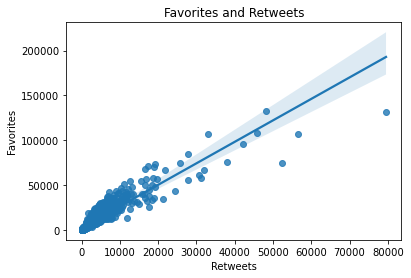

In [131]:
import seaborn as sb
g = sb.regplot(x=we_rate_dogs.retweet_count, y=we_rate_dogs.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()

# Most Liked Tweet and picture

In [132]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
277,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
687,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
53,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,np.nan,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True
360,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,np.nan,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
100,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True


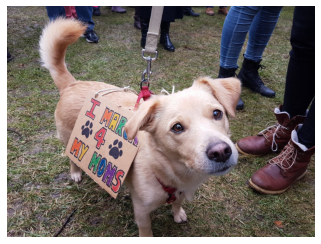

In [2]:
# check image
from skimage import io
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

That is a very very cute dog and no surprises here why it is the most liked in this dataset.

# Most Retweeted Tweet

In [133]:
most_rtw = we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)
most_rtw

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
687,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True
360,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,np.nan,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
714,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,13,10,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
277,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,13,10,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
53,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,np.nan,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


In [134]:
# check full url for the image of the most retweeted dog
we_rate_dogs.jpg_url[687]


'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

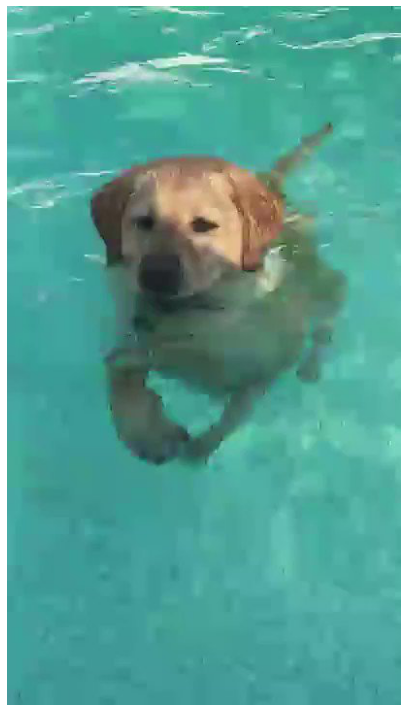

In [23]:
# display image of most retweeted dog
from skimage import io
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14, 10]
plt.rcParams["figure.autolayout"] = True

f = "https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

I will like to know the most used source for all tweets that are in this archive.

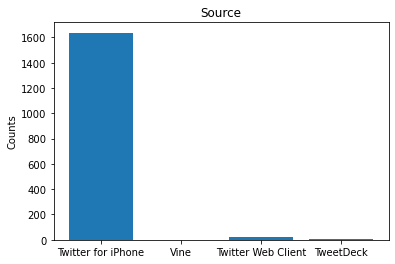

In [135]:
counts = [we_rate_dogs.query('source == "Twitter for iPhone"').count()[0], we_rate_dogs.query('source == "Vine"').count()[0],
          we_rate_dogs.query('source == "Twitter Web Client"').count()[0], we_rate_dogs.query('source == "TweetDeck"').count()[0]]
ind = np.arange(1, 5)
fig, ax = plt.subplots();
plt.bar(ind, counts);
ax.set_xticks(ind);
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']
ax.set_xticklabels(new_source_list);
ax.set_ylabel('Counts');
ax.set_title('Source');

Twitter for iphone is the most used source.

## What measure of spread best represents the Favorite and Retweet Counts

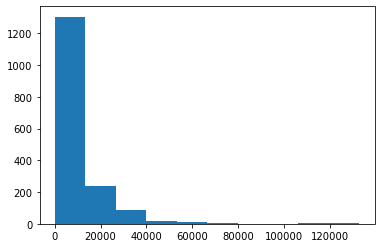

In [136]:
plt.hist(we_rate_dogs.favorite_count);

It looks like there are outliers, i will plot a boxplot to check exactly where the outliers are

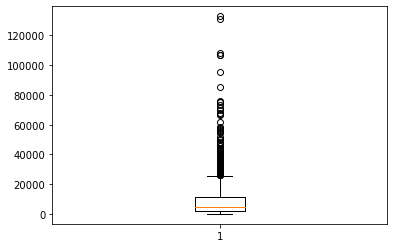

In [137]:
plt.boxplot(we_rate_dogs.favorite_count.reset_index(drop = True));

In [139]:
rem_out = we_rate_dogs[we_rate_dogs.favorite_count < 20000]

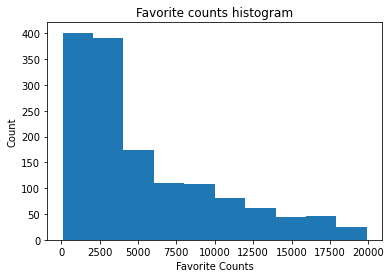

In [140]:
fig, ax = plt.subplots()
plt.hist(rem_out.favorite_count);
plt.title('Favorite counts histogram');
ax.set_ylabel('Count');
ax.set_xlabel('Favorite Counts');

The data appears to be right skewed, when data is skewed the Median is the go-to measure of spread is the Median, the mean cannot be reported here as it is higher.

In [142]:
# check for median with .describe
we_rate_dogs.favorite_count.describe()

count      1668.000000
mean       9254.534772
std       12622.418259
min          81.000000
25%        2151.500000
50%        4448.500000
75%       11667.750000
max      132810.000000
Name: favorite_count, dtype: float64

The median is 4448.

#### `Retweet Counts`

(array([1.562e+03, 7.100e+01, 2.000e+01, 6.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.60000e+01, 7.96590e+03, 1.59158e+04, 2.38657e+04, 3.18156e+04,
        3.97655e+04, 4.77154e+04, 5.56653e+04, 6.36152e+04, 7.15651e+04,
        7.95150e+04]),
 <BarContainer object of 10 artists>)

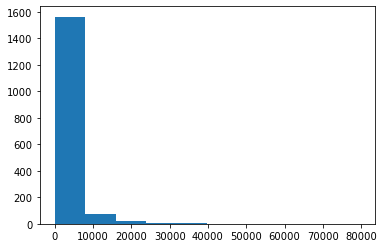

In [143]:
plt.hist(we_rate_dogs.retweet_count)

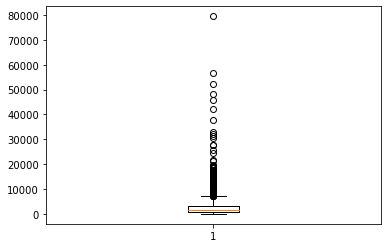

In [144]:
# check for outliers with boxplot
plt.boxplot(we_rate_dogs.retweet_count.reset_index(drop = True));

In [146]:
less_fav =we_rate_dogs[we_rate_dogs.retweet_count < 10000]

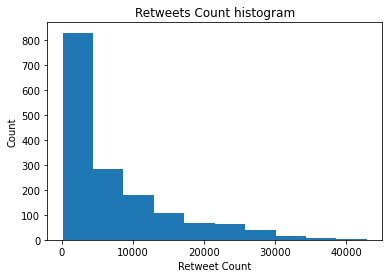

In [147]:
fig, ax = plt.subplots()
plt.hist(less_fav.favorite_count);
plt.title('Retweets Count histogram');
ax.set_ylabel('Count');
ax.set_xlabel('Retweet Count');

This data is also right skewed and the median will be the best measure of spread to report.

In [148]:
# check for the median using .describe

we_rate_dogs.retweet_count.describe()

count     1668.000000
mean      2819.443046
std       4818.212318
min         16.000000
25%        648.750000
50%       1430.500000
75%       3251.000000
max      79515.000000
Name: retweet_count, dtype: float64

The median for retweet counts is 1430.

### Insights:
1. Retweets and Likes are positively correlated.

2. Twitter for iphone is the most used source.

3. The median is the best measure of spread to be reported for both retweets and likes.